In [6]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly

In [2]:
class fish(object):
    def __init__(self, status, ppm, weight, unc, uncy):
        self.status = status
        self.ppm = ppm
        self.weight = weight
        self.unc = unc
        self.uncy = uncy

In [3]:
#sample1: swai basa fillet, Vietnam, farmed
ppm = 0.035
#weight in kg
weight = 2
unc = 1
sample1 = fish('farm', 0.035, 2, 1, 0.005)

#sample2: Hamachi Fillet from Japan, wild
ppm2 = 0.234
weight2 = 6.8
unc2 = 2.3
sample2 = fish('wild', 0.234, 6.8, 2.3, 0.042)

#sample3: Cardinal snapper, Mexico, wild 
ppm3 = 0.024
weight3 = 0.85
unc3 = 0.4
sample3 = fish('wild', 0.024, 0.85, 0.4, 0.0037)

#sample4: Shortraker steak, Canada, wild
ppm4 = 0.22
weight4 = 20 
unc = 3
sample4 = fish('wild', 0.22, 20, 3, 0.0278)

#sample7: Grass Carp steak, Taiwan, farmed 
ppm5 = 0.09
weight5 = 19 
unc5 = 16
sample7 = fish('farm', 0.09, 19, 16, 0.012)

#sample8: Grass Carp steak, Tawian, farmed
ppm6 = 0.064
weight6 = 19
unc6 = 16
sample8 = fish('farm', 0.064, 19, 16, 0.0093)

#sample9: Chilean Sea Bass, Korea, wild 
ppm7 = 0.09
weight7 = 40
unc7 = 0.13
sample9 = fish('wild', 0.09, 40, 0.13, 0.0114)

#sample10: Wild Isle Salmon, Scotland, farmed
#the fact that it's farmed might influence mercury build up
ppm8 = 0.0085
weight8 = 13
unc8 = 7
sample10 = fish('farm', 0.0085, 13, 7, 0.0015)

#sample11: Mackerel, India, wild
ppm9 = 0.066
weight9 = 0.295
unc9 = 0.155
sample11 = fish('wild', 0.066, 0.295, 0.155, 0.0104)

#sample12: Norwegian Basa, Norway, wild
ppm10 = 0.046
weight10 = 2
unc10 = 1
sample12 = fish('wild', 0.046, 2, 1, 0.0067) 

#sample13: Golden Pompano, China, farmed
ppm11 = 0.02
weight11 = 1.4
unc11 = 0.4
sample13 = fish('farm', 0.02, 1.4, 0.4, 0.00305)

#sample14: Chilean Sea Bass, Arctic, wild
ppm12 = 0.15
weight12 = 40
unc12 = 0.13
sample14 = fish('wild', 0.15, 40, 0.13, 0.0197)

#sample15: HD Shrimp, Venezuela, farmed
ppm13 = 0.037
weight13 = 0.06
unc13 = 0.028
sample15 = fish('farm', 0.037, 0.06, 0.028, 0.0062)

#sample16: Pink Grouper steak, Mexico, wild
ppm14 = 0.75
weight14 = 5.67
unc14 = 3.4
sample16 = fish('wild', 0.075, 5.67, 3.4, 0.0958)


In [4]:
wildppm = []
wildweight = []
wildunc = []
wilduncy = []
farmppm = []
farmweight = []
farmunc = []
farmuncy = []
samples = [sample1, sample2, sample3, sample4, sample7, sample8, sample9,
          sample10, sample11, sample12, sample13, sample14, sample15, sample16]
for s in samples:
    if s.status == 'wild':
        wildppm.append(s.ppm)
        wildweight.append(s.weight)
        wildunc.append(s.unc)
        wilduncy.append(s.uncy)
    else:
        farmppm.append(s.ppm)
        farmweight.append(s.weight)
        farmunc.append(s.unc)
        farmuncy.append(s.uncy)
print(len(wildppm), len(farmppm))

8 6


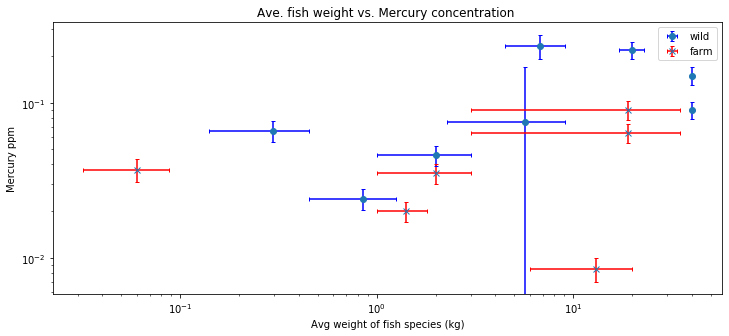

In [15]:
mpl_fig = plt.figure(figsize=(12,5))
ax = mpl_fig.add_subplot(111)
p1 = plt.errorbar(wildweight, wildppm, yerr=wilduncy, xerr=wildunc, fmt='o', ecolor='blue', capthick=1, capsize=2, label='wild')
p2 = plt.errorbar(farmweight, farmppm, yerr=farmuncy, xerr=farmunc, fmt='x', ecolor='red', capthick=1, capsize=2, label='farm')

y_title='Mercury ppm'
x_title='Avg weight of fish species (kg)'
title_text='Ave. fish weight vs. Mercury concentration '
plt.legend()
plt.ylabel(y_title)
plt.title(title_text)
plt.xlabel(x_title)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

fig = go.Figure(
        data=[
            go.Scatter(
                name='wild',
                x=wildweight,
                y=wildppm,
                mode='markers',
                marker=dict(size=10,
                            color=0),
                error_y=dict(
                    type='data', # value of error bar given in data coordinates
                    array=wilduncy,
                    visible=True),
                error_x=dict(
                    type='data', # value of error bar given in data coordinates
                    array=wildunc,
                    visible=True)),
            go.Scatter(
                name='farmed',
                x=farmweight,
                y=farmppm,
                mode='markers',
                marker=dict(size=10,
                            color=0),
                error_y=dict(
                    type='data', # value of error bar given in data coordinates
                    array=farmuncy,
                    visible=True),
                error_x=dict(
                    type='data', # value of error bar given in data coordinates
                    array=farmunc,
                    visible=True))
        ])

fig.update_layout(yaxis_type="log",xaxis_type="log")
fig.update_layout(plot_bgcolor='white')#,width=700, height=700)
fig.update_yaxes(linecolor='black',tickfont=dict(color='black', size=16))
fig.update_xaxes(linecolor='black',tickfont=dict(color='black', size=16))
fig.update_layout(legend_orientation="h",legend=dict(x=0.5, y=1.1))
fig.update_layout(barmode='group')
fig.update_layout(yaxis_title=y_title,xaxis_title=x_title,
                  font=dict(size=18)
)

fig.show()
fig.write_html("2017-mercury-size.html",include_plotlyjs=False)